In [ ]:
import pandas as pd
dataset = pd.read_csv('caravan-insurance-challenge.csv')
dataset.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

Apart from the first column 'ORIGIN' all the columns are of type int.

In [ ]:
dataset.isnull().sum()

ORIGIN      0
MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
CARAVAN     0
Length: 87, dtype: int64

There are no null values present in the dataset

In [ ]:
dataset['ORIGIN'].value_counts()

train    5822
test     4000
Name: ORIGIN, dtype: int64

In [ ]:
dataset['CARAVAN'].value_counts()

0    9236
1     586
Name: CARAVAN, dtype: int64

<Axes: xlabel='CARAVAN', ylabel='count'>

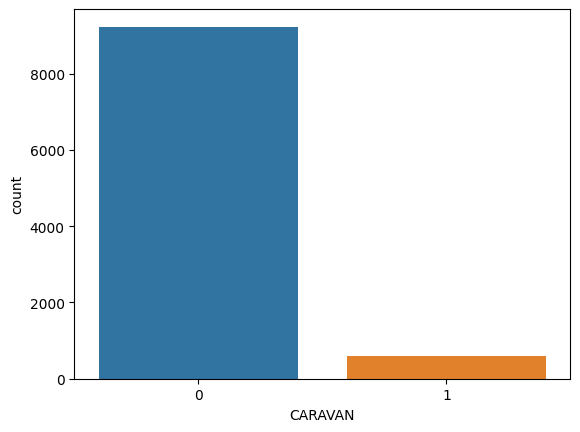

In [ ]:
import seaborn as sns
sns.countplot(dataset, x = 'CARAVAN')

The dataset is unbalanced

Methods to balance the data:
- Undersampling : Reducing the number of '0' to match the '1'
- Oversampling : Increasing the datapoints with similar data not duplicatate to match the number of '1' to '0'

**1. Using Under Sampling**



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x = dataset.drop('CARAVAN',axis = 1)
y = dataset['CARAVAN']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(x['ORIGIN'])
x['Origin'] = label
x.drop('ORIGIN',inplace = True , axis = 1)

In [ ]:
x_us,y_us = rus.fit_resample(x,y)

In [ ]:
x_us.count()

MOSTYPE     1172
MAANTHUI    1172
MGEMOMV     1172
MGEMLEEF    1172
MOSHOOFD    1172
            ... 
APLEZIER    1172
AFIETS      1172
AINBOED     1172
ABYSTAND    1172
Origin      1172
Length: 86, dtype: int64

In [ ]:
y_us.count()

1172

In [ ]:
y_us

0       0
1       0
2       0
3       0
4       0
       ..
1167    1
1168    1
1169    1
1170    1
1171    1
Name: CARAVAN, Length: 1172, dtype: int64

Now the values of the both the classes is same 1172 hence the data is now balanced.
The drawback of undersampling is that we may lose important data while reducing the number of data points





---

**2. Over Sampling**

The methods we will be using for over sampling are
- RandomOverSampler: As the name suggests it randomly increases the number of data points of the lesser class
- SMOTE

In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

**Using RandomOverSampler**

In [ ]:
ros = RandomOverSampler()
x_ros,y_ros = ros.fit_resample(x,y)

In [ ]:
x_ros.count()


MOSTYPE     18472
MAANTHUI    18472
MGEMOMV     18472
MGEMLEEF    18472
MOSHOOFD    18472
            ...  
APLEZIER    18472
AFIETS      18472
AINBOED     18472
ABYSTAND    18472
Origin      18472
Length: 86, dtype: int64

In [ ]:
print(y_ros)

0        0
1        0
2        0
3        0
4        0
        ..
18467    1
18468    1
18469    1
18470    1
18471    1
Name: CARAVAN, Length: 18472, dtype: int64


**Using SMOTE**

SMOTE stands for Synthetic Minority Oversampling Technique where we use the existing data points of the minority class and create new similar but not duplicate datapoints

In [ ]:
x_smote,y_smote = SMOTE().fit_resample(x,y)

SMOTE can only be used to data points which are in int or numberical values it does not work for data types like string or character since we have already coverted the 'ORIGIN' column into categorical data there is no error

In [ ]:
x.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Origin
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,1
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,1
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,1
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,1
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
x_smote.count()

MOSTYPE     18472
MAANTHUI    18472
MGEMOMV     18472
MGEMLEEF    18472
MOSHOOFD    18472
            ...  
APLEZIER    18472
AFIETS      18472
AINBOED     18472
ABYSTAND    18472
Origin      18472
Length: 86, dtype: int64

In [ ]:
y_smote.count()

18472

We will be using Classification models to predict if they will take insurance or not where 0 - Not Taken 1 - Taken

In [ ]:
x_us.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Origin
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,...,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,22.862628,1.114334,2.768771,2.965870,5.477816,0.738908,4.665529,1.052901,3.199659,6.444539,...,0.003413,0.017065,0.004266,0.648464,0.002560,0.017065,0.034983,0.009386,0.027304,0.600683
std,13.406312,0.384009,0.776654,0.785563,2.963833,1.007277,1.704189,1.028509,1.634199,1.770186,...,0.058346,0.129568,0.065205,0.559955,0.050551,0.142140,0.221719,0.096465,0.163037,0.489967
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,1.000000,3.000000,3.000000,6.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,41.000000,8.000000,6.000000,6.000000,10.000000,7.000000,9.000000,5.000000,8.000000,9.000000,...,1.000000,1.000000,1.000000,7.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000


In [ ]:
x_ros.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Origin
count,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,...,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000
mean,22.763263,1.106756,2.743828,2.994424,5.458045,0.731810,4.701332,1.058521,3.168417,6.421828,...,0.003844,0.013913,0.005414,0.639238,0.002761,0.019164,0.039032,0.011585,0.024253,0.597878
std,13.522751,0.368152,0.777916,0.792896,2.990515,1.008474,1.687824,1.030469,1.621299,1.819818,...,0.061880,0.117133,0.076274,0.538079,0.052473,0.151726,0.242349,0.107516,0.154189,0.490340
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,1.000000,3.000000,3.000000,6.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000


In [ ]:
x_smote.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Origin
count,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,...,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000,18472.000000
mean,22.671124,1.082612,2.669987,2.890754,5.403313,0.635340,4.584344,0.947326,3.020139,6.298452,...,0.002436,0.004223,0.002274,0.577902,0.000487,0.005197,0.023982,0.004493,0.009095,0.490418
std,13.513807,0.338459,0.731446,0.752724,2.997150,0.907671,1.577970,0.943988,1.538746,1.735963,...,0.049298,0.064846,0.051979,0.530480,0.022068,0.075576,0.178173,0.067688,0.095503,0.499922
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,2.000000,2.000000,2.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,1.000000,3.000000,3.000000,6.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,5.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000


<Axes: >

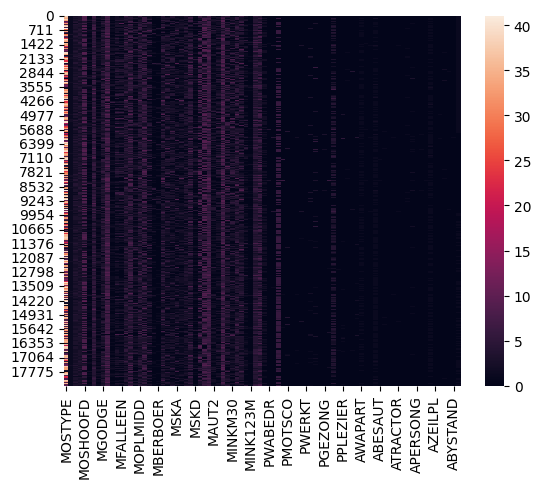

In [ ]:
import seaborn as sns
sns.heatmap(x_smote)

Doubt : How to present a heatmap with more readability and improve the above heatmap

In [ ]:
# importing models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Q - How do I know if the data is linearly seperable or not?

In [ ]:
ls = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC()

Splitting the dataset using train_test_split

1. UnderSmapled data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_us,y_us, test_size = 0.2)

In [ ]:
ls.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,ls.predict(x_test))

0.6553191489361702

In [ ]:
rfc.fit(x_train,y_train)
print(accuracy_score(y_test,rfc.predict(x_test)))
svc.fit(x_train,y_train)
print(accuracy_score(y_test,svc.predict(x_test)))

0.6638297872340425
0.6553191489361702


2. Oversampled Data(RandomOverSampler)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size = 0.2)

ls_ros = LogisticRegression()
rfc_ros = RandomForestClassifier()
svc_ros = SVC()

ls_ros.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
rfc_ros.fit(x_train,y_train)
svc_ros.fit(x_train,y_train)

SVC()

In [ ]:
print(accuracy_score(y_test,ls_ros.predict(x_test)))

0.7060893098782138


In [ ]:
print(accuracy_score(y_test,rfc_ros.predict(x_test)))
print(accuracy_score(y_test,svc_ros.predict(x_test)))

0.9772665764546685
0.7369418132611637


3. OverSampling(SMOTE)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote, test_size = 0.2)
ls_s = LogisticRegression()
rfc_s = RandomForestClassifier()
svc_s = SVC()

ls_s.fit(x_train,y_train)
rfc_s.fit(x_train,y_train)
svc_s.fit(x_train,y_train)

print(accuracy_score(y_test,ls_s.predict(x_test)))
print(accuracy_score(y_test,rfc_s.predict(x_test)))
print(accuracy_score(y_test,svc_s.predict(x_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8243572395128552
0.964276048714479
0.907171853856563





---

**Inference:** From the accuracies of all the models on different types of sampling techniques we can infer that oversampling using SMOTE gives the best results when compared to UnderSampling and Oversampling usinf RandomOverSampler for the given Dataset




---
Next step now is to improve the accuracy of the model by using the appropriate hyperparameters

For this we will be using GRID SEARCH to understand how the model performs for different hyperparameters and choose the best model parameters.




In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty' : ['l2'],
    'C' : [0.1, 0.2,0.5,0.7],
    'fit_intercept' : [True,False],
    'intercept_scaling' : [0.2,0.4,0.6,0.8],
    'solver' : ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
    'max_iter' : [50,125,150,175],
}

ls_gs = GridSearchCV(LogisticRegression(),param_grid, n_jobs=-1, scoring ='roc_auc', verbose=  2, cv=5)
ls_gs.fit(x_train,y_train)
print('Best Prarameters : ', ls_gs.best_params_)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best Prarameters :  {'C': 0.7, 'fit_intercept': True, 'intercept_scaling': 0.2, 'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [ ]:
ls_2 = LogisticRegression(penalty='l2', C=0.7,fit_intercept=True, intercept_scaling = 0.2, max_iter = 50, solver = 'newton-cholesky')
ls_2.fit(x_train,y_train)
print(accuracy_score(y_test,ls_2.predict(x_test)))

0.9090663058186739


After using the best hyperparameter the accuracy we get by using logistic Regression is 90%



---

Finding the best parameters for RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : [50,75,100,125],
    'criterion' : ['gini','entropy','log_loss'],
    'max_features' : ['sqrt','log2'],
    'n_jobs' : [-1],
    'class_weight' : ['balanced','balanced_subsample'],
}
rfc_gs = GridSearchCV(RandomForestClassifier(),param_grid,n_jobs=-1, scoring='roc_auc')
rfc_gs.fit(x_train,y_train)
print('Best Parameters : ', rfc_gs.best_params_)

Best Parameters :  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 125, 'n_jobs': -1}


In [ ]:
rfc_bp = RandomForestClassifier(n_estimators=125,criterion='log_loss',max_features='log2',n_jobs=-1,class_weight='balanced_subsample')
rfc_bp.fit(x_train,y_train)
print(accuracy_score(y_test,rfc_bp.predict(x_test)))

0.964276048714479


The change in the accuracy of the RandomForestClassifier is very minute for this dataset.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C' : [0.5,1,1.5,2],
    'kernel' : ['linear','poly','rbf','sigmoid'],
    'degree' : [2,3,4,5],
    'gamma' : ['scale','auto'],
    'class_weight' : ['dict','balanced'],
    'max_iter' : [50,100,150,-1],
    'decision_function_shape' : ['ovo','ovr'],
}

svc_gs= GridSearchCV(SVC(),param_grid,n_jobs=-1,scoring='roc_auc',verbose=2,cv=5)
svc_gs.fit(x_train,y_train)
print('Best Parameters : ', svc_gs.best_params_)

Fitting 5 folds for each of 2048 candidates, totalling 10240 fits


In [ ]:
dataset.corr()

<ipython-input-38-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
MOSTYPE,1.000000,-0.040328,-0.006594,0.014428,0.992712,-0.203087,0.092478,-0.029237,-0.016571,-0.050488,...,0.021546,-0.011611,0.000815,0.000469,-0.005283,-0.012901,-0.025533,-0.016336,-0.043749,-0.060742
MAANTHUI,-0.040328,1.000000,-0.004315,0.052448,-0.048317,0.004304,-0.031296,0.020160,0.018018,0.006801,...,-0.003267,0.007011,-0.012374,-0.001343,-0.007991,-0.001384,-0.012526,0.031936,-0.005851,-0.002836
MGEMOMV,-0.006594,-0.004315,1.000000,-0.339942,0.029737,0.009383,0.053455,-0.113296,-0.010404,0.531272,...,-0.002878,0.017853,0.019305,-0.004668,0.003888,-0.013174,0.018487,0.010928,0.030856,0.046224
MGEMLEEF,0.014428,0.052448,-0.339942,1.000000,0.009698,-0.038454,0.091775,0.058412,-0.114922,-0.058155,...,0.020911,-0.001029,-0.001511,0.017606,-0.004048,0.008401,0.018824,-0.009157,-0.012377,-0.004227
MOSHOOFD,0.992712,-0.048317,0.029737,0.009698,1.000000,-0.208057,0.100622,-0.038340,-0.018710,-0.012349,...,0.022526,-0.009087,0.002128,-0.000024,-0.003526,-0.015422,-0.027067,-0.015549,-0.041213,-0.059306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
APLEZIER,-0.012901,-0.001384,-0.013174,0.008401,-0.015422,0.006387,0.008432,0.013550,-0.015563,-0.005817,...,0.014902,-0.005840,-0.003919,0.007674,0.041168,1.000000,-0.009822,0.022228,0.036679,0.082763
AFIETS,-0.025533,-0.012526,0.018487,0.018824,-0.027067,-0.002163,-0.000858,0.029632,-0.007659,0.014027,...,0.011425,0.030430,-0.009035,-0.035900,-0.004557,-0.009822,1.000000,0.002044,0.007121,0.021721
AINBOED,-0.016336,0.031936,0.010928,-0.009157,-0.015549,0.006327,-0.006337,-0.012127,0.005592,-0.000396,...,0.026359,0.016602,-0.005477,0.041820,0.106203,0.022228,0.002044,1.000000,0.017277,0.014142
ABYSTAND,-0.043749,-0.005851,0.030856,-0.012377,-0.041213,-0.007917,0.021748,0.009569,-0.028411,0.031156,...,0.004827,0.067427,0.005081,0.035341,-0.003562,0.036679,0.007121,0.017277,1.000000,0.050703


<ipython-input-39-e4610b9f4e39>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype = np.bool),


<Axes: >

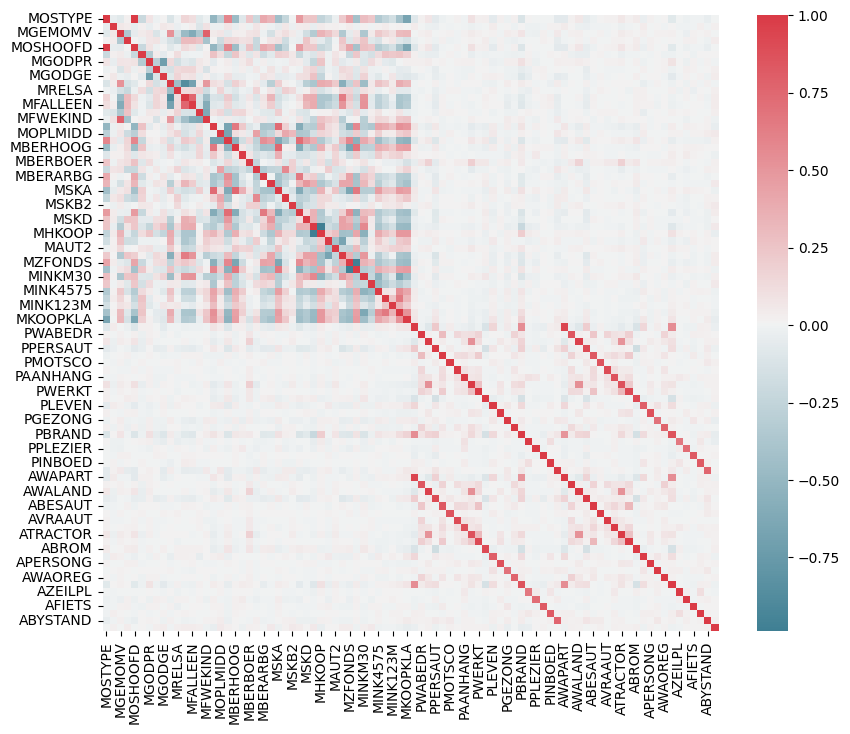

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

f,ax = plt.subplots(figsize=(10,8))
corr = x_smote.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype = np.bool),
            cmap= sns.diverging_palette(220,10,as_cmap=True),square= True , ax=ax)

In [ ]:
len(dataset.axes[1])

87

In [ ]:
column_list=[]
for col in x_train.columns:
  column_list.append(col)

print(column_list)

['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND', 'Origin']


In [ ]:
from scipy.stats import pearsonr
list3 = []
for i in range(86):
  list1 = x_train[column_list[i]]

  for j in range(i+1,86):
    list2 = x_train[column_list[j]]
    corr,_ = pearsonr(list1,list2)
    if corr < 0.0003 and corr > -0.0003 :
      print(column_list[i],column_list[j],corr)
      if column_list[i] not in list3 :
        list3.append(column_list[i])
      if column_list[j] not in list3 :
        list3.append(column_list[j])



MOSTYPE MSKB2 0.0002765542544080027
MOSTYPE PMOTSCO 7.539249165982795e-05
MGEMLEEF PZEILPL -0.00027990670995292947
MGODPR APERSONG -0.00025460201651794146
MRELOV AWERKT 0.00014523552289180067
MFWEKIND PAANHANG -0.00019310497717118635
MFWEKIND AWAPART 0.00023879356235355798
MFWEKIND AAANHANG 0.00017473907832448766
MOPLLAAG PAANHANG -1.6078630915646215e-05
MBERZELF PVRAAUT 0.00018978231327123826
MBERZELF PZEILPL 0.000188788442067293
MBERMIDD AWAOREG 0.0002866041166001298
MSKA PVRAAUT 0.00016273717369115327
MSKB2 PZEILPL -0.00019254716798291528
MSKC AFIETS 0.00017307715147654094
MAUT0 PVRAAUT 0.00011489541580963873
MAUT0 PWERKT -2.688263058980584e-05
MINKM30 PINBOED -2.08674070370069e-05
MINKM30 AVRAAUT -0.00015560255750355842
MINK3045 PMOTSCO 2.3250969442766348e-05
MINKGEM PINBOED 1.4892388620740046e-05
MKOOPKLA PZEILPL 0.00025530492898365783
PMOTSCO PBROM 6.845664343395168e-05
PMOTSCO AWALAND -0.00017089241540342755
PAANHANG AGEZONG 1.5838305817247184e-05
PPLEZIER APERSONG 0.00017952824

By taking a threshold value for the correlation between the features as 0.005 we have got a list of features along with their correlations. Using this we will train the new model to check if there is any improvement or atleast or par with the previous model trained

In [ ]:
len(list3)

36

In [ ]:
for i in range(1,86):
  list1 = dataset['CARAVAN']

  list2= dataset[column_list[i]]
  corr,_ = pearsonr(list1,list2)
  print('Caravan ',column_list[i],corr )

Caravan  MOSTYPE -0.06074174399575579
Caravan  MAANTHUI -0.0028362006137673578
Caravan  MGEMOMV 0.04622372782314827
Caravan  MGEMLEEF -0.004226647412368134
Caravan  MOSHOOFD -0.05930647979068922
Caravan  MGODRK 0.01499336660803247
Caravan  MGODPR 0.022810971791961804
Caravan  MGODOV 0.006226458336506844
Caravan  MGODGE -0.03508599909667496
Caravan  MRELGE 0.06716775728528854
Caravan  MRELSA -0.032469752034715464
Caravan  MRELOV -0.05878742105724481
Caravan  MFALLEEN -0.05434896445323218
Caravan  MFGEKIND -0.002156370451713244
Caravan  MFWEKIND 0.0408395203663654
Caravan  MOPLHOOG 0.08437325673875105
Caravan  MOPLMIDD 0.03565374340169364
Caravan  MOPLLAAG -0.08483524180415464
Caravan  MBERHOOG 0.05835369825279072
Caravan  MBERZELF 0.03260557550669953
Caravan  MBERBOER -0.057810660968095506
Caravan  MBERMIDD 0.04050545461435734
Caravan  MBERARBG -0.03510374477432334
Caravan  MBERARBO -0.053766787067402705
Caravan  MSKA 0.06480991376285213
Caravan  MSKB1 0.0277391922626213
Caravan  MSKB2 

In [ ]:
for i in range (1,86) :
  rfc_1 = RandomForestClassifier(n_estimators=125,criterion='log_loss',max_features='log2',n_jobs=-1,class_weight='balanced_subsample')
  rfc_1.fit(x_train.drop(column_list[i],axis = 1),y_train)
  print(accuracy_score(y_test,rfc_1.predict(x_test.drop(column_list[i],axis = 1))))


0.957510148849797
0.9569688768606225
0.9556156968876861
0.9583220568335589
0.9591339648173207
0.956427604871448
0.9591339648173207
0.9561569688768606
0.9561569688768606
0.9580514208389715
0.9566982408660352
0.9572395128552097
0.9566982408660352
0.9550744248985115
0.956427604871448
0.9583220568335589
0.9577807848443843
0.9572395128552097
0.9566982408660352
0.9580514208389715
0.9583220568335589
0.9585926928281462
0.9556156968876861
0.957510148849797
0.9602165087956698
0.9572395128552097
0.9566982408660352
0.9588633288227334
0.9588633288227334
0.9569688768606225
0.956427604871448
0.956427604871448
0.9580514208389715
0.9569688768606225
0.9569688768606225
0.9566982408660352
0.959404600811908
0.9572395128552097
0.9585926928281462
0.957510148849797
0.957510148849797
0.9558863328822733
0.9585926928281462
0.9548037889039243
0.956427604871448
0.9572395128552097
0.959404600811908
0.9569688768606225
0.9569688768606225
0.9585926928281462
0.9572395128552097
0.9556156968876861
0.9580514208389715
0.95

Inference : In this code the problem is that the model should not have any prior knowledge of the previous iteration since that is not the case we are getting the accuarcy of each iteration similar.

The other assumption can be that each and every feature is contributing smimlarly.

To prove this we will have to use a new model for every iteration.


In [ ]:
for i in range(1,86) :
  print(accuracy_score(y_test,RandomForestClassifier().fit(x_train.drop(column_list[i],axis = 1),y_train).predict(x_test.drop(column_list[i],axis = 1))))


0.9537212449255751
0.9558863328822733
0.9561569688768606
0.9580514208389715
0.9591339648173207
0.9583220568335589
0.9585926928281462
0.9561569688768606
0.9583220568335589
0.9566982408660352
0.9588633288227334
0.9577807848443843
0.9585926928281462
0.9577807848443843
0.956427604871448
0.9572395128552097
0.9577807848443843
0.957510148849797
0.9550744248985115
0.9569688768606225
0.9580514208389715
0.9572395128552097
0.959404600811908
0.9583220568335589
0.9569688768606225
0.9553450608930988
0.956427604871448
0.956427604871448
0.9548037889039243
0.9577807848443843
0.957510148849797
0.9566982408660352
0.957510148849797
0.9553450608930988
0.9583220568335589
0.9569688768606225
0.9585926928281462
0.9558863328822733
0.9588633288227334
0.9566982408660352
0.957510148849797
0.9558863328822733
0.9566982408660352
0.9577807848443843
0.9580514208389715
0.9558863328822733
0.9588633288227334
0.9577807848443843
0.9572395128552097
0.9566982408660352
0.9583220568335589
0.9580514208389715
0.9553450608930988
0

In [ ]:
df = x_train.copy()
for i in range(len(column_list)) :
  if column_list[i] not in list3 :
    df.drop(column_list[i],axis = 1, inplace=True)

In [ ]:
df.head()

,MOSTYPE,MOPLLAAG,MAUT0,MINKM30,MINK3045,MINKGEM,PMOTSCO,PAANHANG,PWERKT,PBROM,PINBOED,PBYSTAND,AGEZONG,AINBOED
5157,24,3,2,5,3,3,0,0,0,0,0,0,0,0
18417,9,2,0,0,3,5,0,0,0,0,0,0,0,0
16476,39,5,2,2,4,4,0,0,0,0,0,0,0,0
11402,35,5,1,2,4,3,0,0,0,0,0,0,0,0
2333,39,8,4,7,2,2,4,0,0,0,0,0,0,0


Here we have reduced the data set from 86 columns to 14 columns.

Now let us check what affect it will have on the performance of the mode.

In [ ]:
df_test = x_test.copy()
for i in range(len(column_list)):
  if column_list[i] not in list3 :
    df_test.drop(column_list[i],axis = 1 , inplace=True)

In [ ]:
rfc_fs = RandomForestClassifier(n_estimators=125,criterion='log_loss',max_features='log2',n_jobs=-1,class_weight='balanced_subsample')
rfc_fs.fit(df,y_train)
print(accuracy_score(y_test,rfc_fs.predict(df_test)))

0.9410013531799729


As we can see the accuracy has droped to 89.87% so we need to change the treshold value

Now that we changed the threshold value to 0.0003 we got 36 columns now let us check how it affects the accuracy of the model.

The accuracy only dropped by 2% that is from 96% to 94%.

This in turn reduces the computational power required to process 86 columns by reducing it to 36.

Let us further try to reduce the number of columns to find the least number of columns which can give a similar accuracy.

<ipython-input-97-4651a2e4f28a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask = np.zeros_like(corr,dtype= np.bool),


<Axes: >

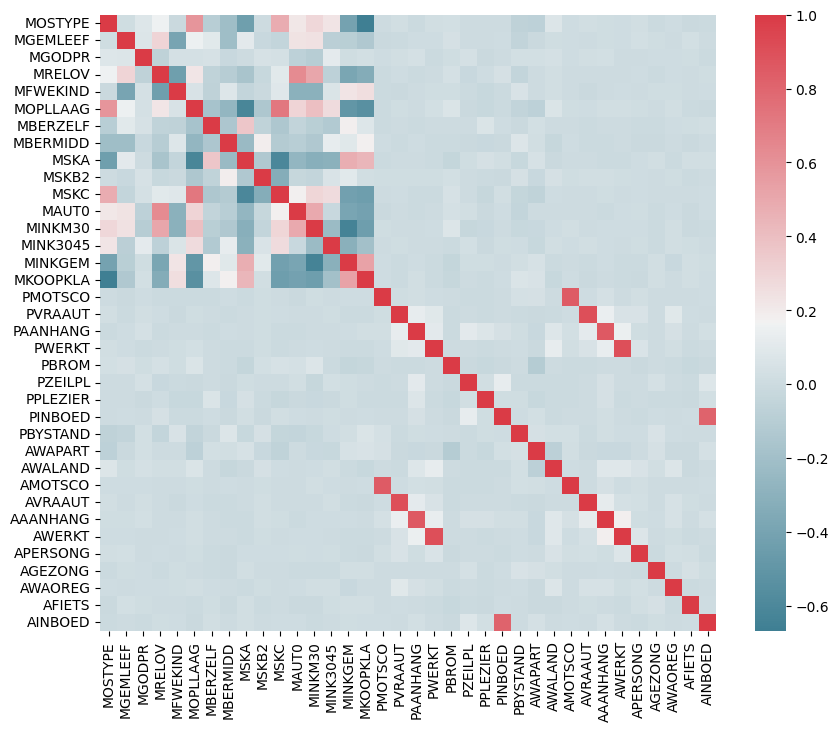

In [ ]:
f,ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,mask = np.zeros_like(corr,dtype= np.bool),
            cmap=sns.diverging_palette(220,10,as_cmap=True),square = True,ax=ax)

After reducing the columns to 36 the heatmap is more clear and understandable.

In [ ]:
column_list2 =['MKOOPKLA','MINKGEM','MINKM30','MSKA','MFWEKIND','MOPLLAAG','PMOTSCO','PVRAAUT','PAANHANG','PWERKT','PPLEZIER']
for i in range(len(column_list2)) :
  df.drop(column_list2[i],axis = 1 ,inplace = True)
  df_test.drop(column_list2[i],axis=1, inplace = True)


In [ ]:
rfc_3 = RandomForestClassifier(n_estimators= 125,criterion='log_loss',max_features='log2',n_jobs=-1,class_weight='balanced_subsample')
rfc_3.fit(df,y_train)
print(accuracy_score(y_test,rfc_3.predict(df_test)))

0.9258457374830853


As we can see removing anymore features results in drop of accuracy by further 1.5% which is not acceptable.




---



---

**Inference:**
1. Using SMOTE gives a better result than using RandomOverSampler.
2. We were able to derive the best features which could be used for the RandomForestClassifier, SVC, LogisticRegression.
3. Among the three models the accuracy of RandomForestClassifier was the best 95%.
4. By reducing the features from 86 to 36 using the correlation values there was a drop of only 1% in the accuracy of the model.




---



---

**Next step is to perform PCA on the remaining data.**